# Assignment 3

Fajri Sofianto

membuat machine learning dengan berbagai macam metode

file yang digunakan : https://archive.ics.uci.edu/dataset/222/bank+marketing

data training yaitu data Bank Additional Full dan
data testing yaitu data Bank Additional



In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image  
from six import StringIO
import pydotplus

import graphviz



In [2]:
df_train = pd.read_csv('D:\File_Analisa_Python\Bank-additional-full.csv', sep=';')  #import data untuk training
#df_test = pd.read_csv('D:\File_Analisa_Python\Bank-full.csv', sep=';')              
df_test = pd.read_csv('D:\File_Analisa_Python\Bank-additional.csv', sep=';')        # import data untuk testing
#df_test = pd.read_csv('D:\File_Analisa_Python\Bank.csv', sep=';')


print('----------------------------')
print('Data Training')
display(df_train)
print('----------------------------')
print('Data Testing')
display(df_test)
print('----------------------------')

----------------------------
Data Training


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


----------------------------
Data Testing


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


----------------------------


In [3]:
def visualCM(x, y, total_label=2, title=""):
  cm = confusion_matrix(x, y)
  fig, ax = plt.subplots(figsize=(total_label, total_label))
  ax.imshow(cm)
  ax.grid(False)
  ticks = range(0, total_label)
  ax.xaxis.set(ticks=ticks, ticklabels=ticks)
  ax.yaxis.set(ticks=ticks, ticklabels=ticks)
  ax.set_ylim(total_label-0.5, -0.5)
  for i in range(total_label):
      for j in range(total_label):
          ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
  plt.title(title)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

# Encode data training

In [4]:
df_train2 = df_train.copy()

col_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
       'poutcome', 'y']

for c in col_to_encode:
  le = LabelEncoder()
  df_train2[c] = le.fit_transform(df_train2[c])
  print(c, le.classes_)

df_train2.head()

job ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ['divorced' 'married' 'single' 'unknown']
education ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
default ['no' 'unknown' 'yes']
housing ['no' 'unknown' 'yes']
loan ['no' 'unknown' 'yes']
contact ['cellular' 'telephone']
month ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome ['failure' 'nonexistent' 'success']
y ['no' 'yes']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [5]:
df_train_fitur = df_train2.drop(columns='y')
df_train_target = df_train2['y']

# Encode data Testing

In [6]:
df_test2 = df_test.copy()

col_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
       'poutcome', 'y']

for c in col_to_encode:
  le = LabelEncoder()
  df_test2[c] = le.fit_transform(df_test2[c])
  print(c, le.classes_)

df_test2.head()

job ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ['divorced' 'married' 'single' 'unknown']
education ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
default ['no' 'unknown' 'yes']
housing ['no' 'unknown' 'yes']
loan ['no' 'unknown' 'yes']
contact ['cellular' 'telephone']
month ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome ['failure' 'nonexistent' 'success']
y ['no' 'yes']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [7]:
df_test_fitur = df_test2.drop(columns='y')

df_test_target = df_test2['y']

# Machine Learning LR

In [8]:
model_LR = LogisticRegression()

model_LR.fit(df_train_fitur,df_train_target)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
y_pred = model_LR.predict(df_test_fitur)

print(classification_report(df_test_target,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3668
           1       0.66      0.41      0.51       451

    accuracy                           0.91      4119
   macro avg       0.80      0.69      0.73      4119
weighted avg       0.90      0.91      0.90      4119



In [10]:
confusion_matrix(df_test_target,y_pred)

array([[3575,   93],
       [ 267,  184]], dtype=int64)

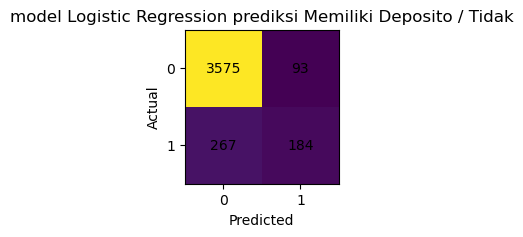

In [11]:
visualCM(df_test_target, y_pred, 2, "model Logistic Regression prediksi Memiliki Deposito / Tidak")

# Kesimpulan 1 Logistic Regression

- terdapat 3.575 + 93 = 3.668 orang tidak memiliki deposito
- model menebak sebanyak 3.575 orang yang tidak memiliki deposito ( 3.575 / 3.668 = 0.93) atau 97% nilai recall
- precision 0.93 artinya model dapat menebak sebesar 93% orang yang tidak memiliki deposito
- hasil akhir F1-score (nilai akurasi) sebesar 0.91 atau 91%


# Machine Learning KNN

In [12]:
y_predKNN = model_LR.predict(df_test_fitur)


model_KNN = KNeighborsClassifier(n_neighbors=3)
model_KNN.fit(df_test_fitur, y_predKNN)



KNeighborsClassifier(n_neighbors=3)

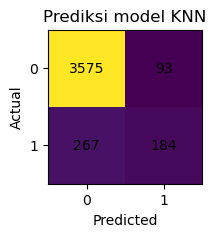

In [13]:
visualCM(df_test_target, y_predKNN, 2, "Prediksi model KNN")

In [14]:
print(classification_report(df_test_target, y_predKNN))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3668
           1       0.66      0.41      0.51       451

    accuracy                           0.91      4119
   macro avg       0.80      0.69      0.73      4119
weighted avg       0.90      0.91      0.90      4119



# Kesimpulan 2 Model KNN

- sebanyak 3.668 data yang tidak punya deposito
- model KNN menebak 3575 + 267 orang yang tidak memiliki deposito, atau 3.575 menebak benar, dan 267 salah
- nilai precision untuk yang tidak memiliki deposito sebesar 0.91
- sebanyak 184 orang memiliki deposito dengan nilai precision sebesar 0.66 
- Data Training dan Data Testing dapat digunakan untuk model ML tersebut


# Machine Learning SVC

In [15]:
model_svc = SVC()
model_svc.fit(df_train_fitur, df_train_target)

SVC()

In [16]:
y_predSVC = model_svc.predict(df_test_fitur)
print(classification_report(df_test_target, y_predSVC))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      3668
           1       0.63      0.23      0.34       451

    accuracy                           0.90      4119
   macro avg       0.77      0.61      0.64      4119
weighted avg       0.88      0.90      0.88      4119



In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

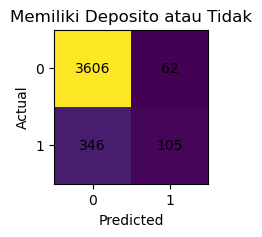

In [18]:
visualCM(df_test_target, y_predSVC, 2, "Memiliki Deposito atau Tidak")

# Kesimpulan 3 Model SVC

- Hasil orang yang memiliki deposito lebih tinggi dibandingkan 2 model sebelumnya dengan selisih recall 0.01
- nilai precision turun dibandingkan dengan 2 model KNN dan LR
- begitu pula dengan tingkat akurasi turun sebesar 1% dibandingkan 2 model sebelumnya

# Machine Learning Decision Tree

In [215]:
model_DT = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model_DT.fit(df_train_fitur, df_train_target)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [216]:
y_predDT = model_DT.predict(df_test_fitur)
print(classification_report(df_test_target, y_predDT))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      3668
           1       0.57      0.44      0.50       451

    accuracy                           0.90      4119
   macro avg       0.75      0.70      0.72      4119
weighted avg       0.89      0.90      0.90      4119



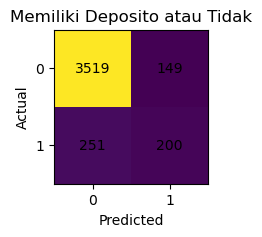

In [217]:
visualCM(df_test_target, y_predDT, 2, "Memiliki Deposito atau Tidak")

# Menampilkan grafik dari Decision Tree dengan Depth 3

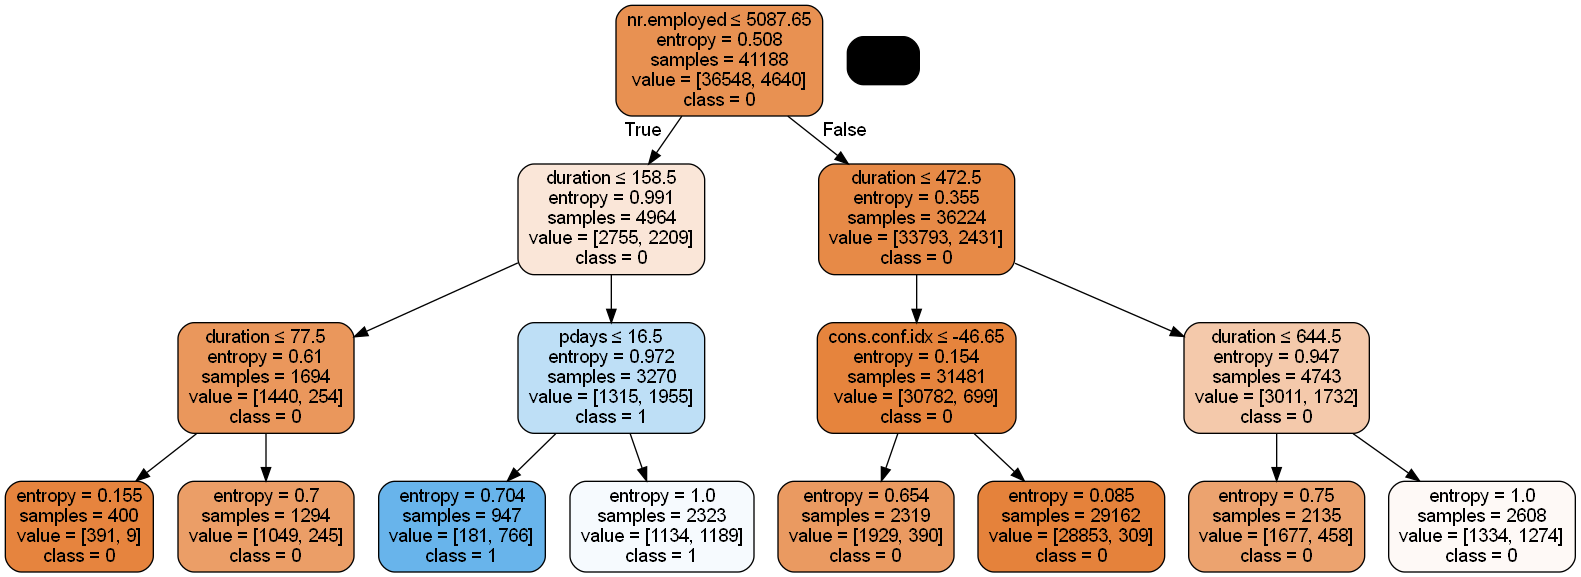

In [72]:
feature_cols = ['age', 'job', 'marital', 'education',
                'default', 'housing', 'loan', 'contact', 'month',
              'day_of_week', 'duration', 'campaign', 'pdays',
              'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
              'cons.conf.idx', 'euribor3m', 'nr.employed']
dot_data = StringIO()
export_graphviz(model_DT, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('depo.png')
Image(graph.create_png())

# Machine Learning menggunakan Random Forrest

In [225]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0, warm_start=False)

model_RF = RandomForestClassifier(n_estimators=3)
model_RF.fit(df_train_fitur, df_train_target)

RandomForestClassifier(n_estimators=3)

In [219]:
y_predRF = model_RF.predict(df_test_fitur)
print(classification_report(df_test_target, y_predRF))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3668
           1       1.00      1.00      1.00       451

    accuracy                           1.00      4119
   macro avg       1.00      1.00      1.00      4119
weighted avg       1.00      1.00      1.00      4119



# Tuning hasil dengan menentukan fitur mana yang tidak berguna

In [220]:
train_col = list(df_train_fitur.columns)
fitur_importance = pd.Series(model_RF.feature_importances_, index=train_col).sort_values(ascending=False)

fitur_importance

duration          0.320592
euribor3m         0.104073
age               0.093457
nr.employed       0.064498
job               0.048306
education         0.043961
campaign          0.042702
day_of_week       0.039890
pdays             0.036140
cons.conf.idx     0.029617
poutcome          0.026130
marital           0.023698
cons.price.idx    0.022290
housing           0.020520
emp.var.rate      0.019616
month             0.017616
loan              0.015019
previous          0.013233
contact           0.010258
default           0.008386
dtype: float64

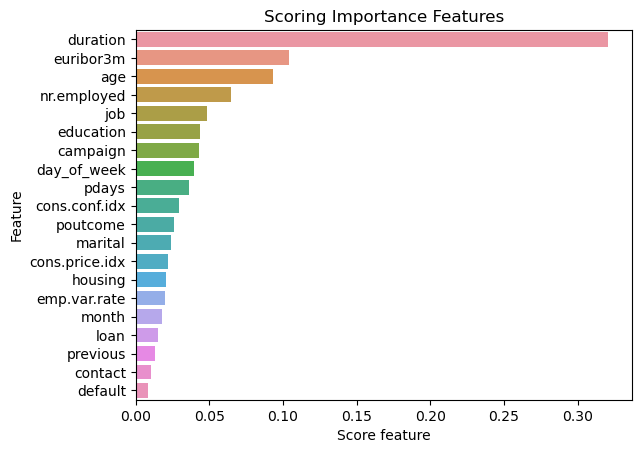

kita coba pakai 3 fitur paling tinggi scorenya


In [221]:
sns.barplot(x=fitur_importance, y=fitur_importance.index)
plt.xlabel('Score feature')
plt.ylabel('Feature')
plt.title('Scoring Importance Features')
plt.show()
print('''kita coba pakai 3 fitur paling tinggi scorenya''')

In [222]:
df_train_fiturRF = df_train_fitur[['duration','euribor3m','age']]
df_train_fiturRF

df_test_fiturRF = df_test_fitur[['duration','euribor3m','age']]

df_test_fiturRF

,duration,euribor3m,age
0,487,1.313,30
1,346,4.855,39
2,227,4.962,25
3,17,4.959,38
4,58,4.191,47
...,...,...,...
4114,53,4.958,30
4115,219,4.959,39
4116,64,1.354,27
4117,528,4.966,58


In [223]:
model_RF = RandomForestClassifier(n_estimators=3)
model_RF.fit(df_train_fiturRF, df_train_target)

RandomForestClassifier(n_estimators=3)

In [224]:
y_predRF = model_RF.predict(df_test_fiturRF)
print(classification_report(df_test_target, y_predRF))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3668
           1       0.90      0.87      0.88       451

    accuracy                           0.98      4119
   macro avg       0.94      0.93      0.94      4119
weighted avg       0.97      0.98      0.98      4119

